Accuracies are calculated in performance_mercer and performance_taggart

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def adjustFigAspect(fig,aspect=1):
    '''
    Adjust the subplot parameters so that the figure has the correct
    aspect ratio.
    '''
    xsize,ysize = fig.get_size_inches()
    minsize = min(xsize,ysize)
    xlim = .4*minsize/xsize
    ylim = .4*minsize/ysize
    if aspect < 1:
        xlim *= aspect
    else:
        ylim /= aspect
    fig.subplots_adjust(left=-.1-xlim,
                        right=.1+xlim,
                        bottom=.5-ylim,
                        top=.5+ylim)

def plt_aspect(aspect):
    fig = plt.figure()
    adjustFigAspect(fig,aspect=aspect)
    return fig.add_subplot(111)

from scipy.stats import fisher_exact

def performance(lstm_h, bptr_h, find_h, totals, labels, title):
    step = .05
    sig_x, sig_y = [], []
    idx = np.linspace(0, step * len(labels), len(labels))
    for i, label in enumerate(labels):
        odds, pvalue =  fisher_exact([[lstm_h[i]*totals[i],
                                       totals[i]-lstm_h[i]*totals[i]],
                                      [bptr_h[i]*totals[i],
                                       totals[i]-bptr_h[i]*totals[i]]])
        print pvalue
        if pvalue < .05:
            sig_x += [idx[i]]
            sig_y += [.02+max(lstm_h[i], bptr_h[i])]
            
    plt_aspect(1.5)
            
    
    plt.scatter(sig_x, sig_y, marker = '*')
    plt.bar(idx-step/4,
            lstm_h, step/4.0, align = 'center', alpha = 0.5,  color = 'green', label = 'LaBranchoR')
    plt.bar(idx,
            bptr_h, step/4.0, align = 'center', alpha = 0.5, label = 'Branchpointer')
    plt.bar(idx+step/4,
            find_h, step/4.0, align = 'center', alpha = 0.5, color = 'orange', label = 'SVM-BPFinder')
    plt.xlim(0-step/1.5, step * len(labels) + step/1.5)
    plt.ylim(0, 1)
    plt.xticks(idx, labels)
    plt.yticks([0], [''])#np.linspace(.5, .95, 10))
    #plt.ylabel("Fraction matching experimental branchpoint")
    plt.yticks(np.linspace(0, 1, 11), np.linspace(0, 1, 11))
    plt.title(title)
    plt.legend(loc = 4)
    plt.show()

2.67360565747e-16
2.36340316251e-20
7.7209131451e-15
6.64067976065e-18
4.15099705181e-18
5.98805812286e-25


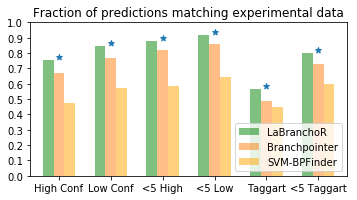

In [2]:
tag = [[0.5622286541244573, 0.8001447178002894],
       [0.48842257597684513, 0.7254703328509406],
       [0.44746743849493487, 0.5969609261939218]]     
tag_totals = [6910] * 2
tag_labels = ['Taggart', '<5 Taggart']

mer = [[0.7510450534138412, 0.8457965629354389, 0.8797027403622851, 0.9163957268927079],
       [0.6709242916860195, 0.7670692057594055, 0.8197863446353925, 0.8576405016256387],
       [0.47120297259637717, 0.5699024616813748, 0.5833720390153274, 0.6446818392940084]]
mer_totals = [4306] * 4
mer_labels = ['High Conf','Low Conf','<5 High','<5 Low']

performance(mer[0]+tag[0], mer[1]+tag[1], mer[2]+tag[2],
            mer_totals+tag_totals, mer_labels+tag_labels,
            'Fraction of predictions matching experimental data')

1.28239302214e-12
1.4495681645e-15
5.78903345018e-11
8.93458567709e-13
9.25202409936e-13
1.91561449931e-18


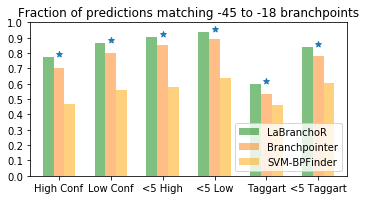

In [3]:
tag = [[0.594581823909277, 0.8401323042998897],
       [0.5315797763427311, 0.7790203181603402],
       [0.45818239092770513, 0.6022995747361789]]  
tag_totals = [6349] * 2
tag_labels = ['Taggart', '<5 Taggart']

mer = [[0.7717549829849295, 0.8648517258142927, 0.9015556635877492, 0.9331550802139037],
       [0.702722411278561, 0.7989790957705396, 0.8541565386485173, 0.8881866796305299],
       [0.4657267865824016, 0.5590666018473505, 0.5753524550315994, 0.6361205639280506]]
mer_totals = [4114] * 4
mer_labels = ['High Conf','Low Conf','<5 High','<5 Low']

performance(mer[0]+tag[0], mer[1]+tag[1], mer[2]+tag[2],
            mer_totals+tag_totals, mer_labels+tag_labels,
            'Fraction of predictions matching -45 to -18 branchpoints')

3.92059950783e-17
8.40551120759e-22
1.05514609032e-14
4.69588178381e-19
7.61534680982e-21
2.03286782029e-25


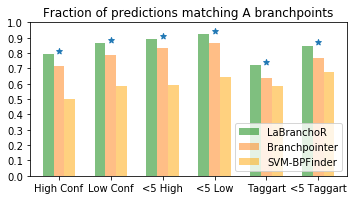

In [4]:
tag = [[0.7198709432529892, 0.84797874359461],
       [0.634465743025242, 0.7680774340482065],
       [0.586828620231543, 0.6731827671284873]]     
tag_totals = [5269] * 2
tag_labels = ['Taggart', '<5 Taggart']

mer = [[0.7947511760336717, 0.8672938846249072, 0.8890814558058926, 0.9230007427581084],
       [0.7140381282495667, 0.7865808368408022, 0.8291656350581827, 0.8615994057935132],
       [0.5023520673434019, 0.5855409754889824, 0.5902451101757861, 0.6422381777667739]]
mer_totals = [4039] * 4
mer_labels = ['High Conf','Low Conf','<5 High','<5 Low']

performance(mer[0]+tag[0], mer[1]+tag[1], mer[2]+tag[2],
            mer_totals+tag_totals, mer_labels+tag_labels,
            'Fraction of predictions matching A branchpoints')

3.51397415151e-11
1.69946213584e-13
9.36666136855e-12
5.07898723919e-13


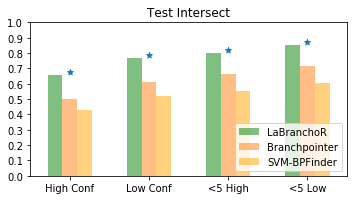

In [5]:
mer = [[0.653276955602537, 0.766384778012685, 0.8002114164904862, 0.854122621564482],
       [0.5021141649048626, 0.6088794926004228, 0.6606765327695561, 0.7177589852008457],
       [0.43023255813953487, 0.5200845665961945, 0.5528541226215645, 0.6067653276955602]]
mer_totals = [946] * 4
mer_labels = ['High Conf','Low Conf','<5 High','<5 Low']

performance(mer[0], mer[1], mer[2],
            mer_totals, mer_labels,
            'Test Intersect')

4.72306891125e-07
4.84191660852e-08
2.52207536647e-07
6.69429266031e-07


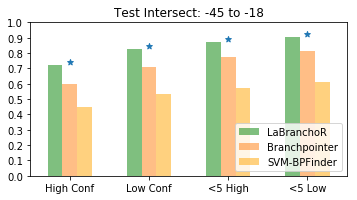

In [6]:
mer = [[0.7191435768261965, 0.8224181360201511, 0.8727959697732998, 0.9005037783375315],
       [0.5982367758186398, 0.7052896725440806, 0.7732997481108312, 0.8123425692695214],
       [0.44962216624685136, 0.5327455919395466, 0.5717884130982368, 0.6095717884130982]]
mer_totals = [794] * 4
mer_labels = ['High Conf','Low Conf','<5 High','<5 Low']

performance(mer[0], mer[1], mer[2],
            mer_totals, mer_labels,
            'Test Intersect: -45 to -18')